# Polynomial Regression

Suppose we are given datasets of explanatory variables $X = \{x_1,\ldots,x_n\}$ and response variables $Y = \{y_1,\ldots,y_n\}$, with (for the sake of simplicity) all $x_j$ and $y_j$ real numbers. 

Last time we studied *simple linear regression*, where we sought to find a function of the form
$$
f(x) = m x + b
$$
minimizing the loss function
$$
L(m,b) = \sum_j (f(x_j) - y_j)^2.
$$

Suppose that we suspect our response variables are not *linearly* related to the explanatory variables, but satisfy
$$
y_j \approx \beta_0 + \beta_1 x_j + \beta_2 (x_j)^2 + \cdots + \beta_m (x_j)^m =: g(x_j),
$$
for some degree $m$ and some constants $\beta_k$. We could once again look for constants minimizing the loss function
$$
M(\beta_0,\beta_1,\ldots,\beta_m) = \sum_j (g(x_j) - y_j)^2
$$
This is called *polynomial regression*.

Observe that if we treat the $x_j, x_j^2, \ldots, x_j^m$ as features in a vector $\vec{x}_j$, then this is exactly the setup for multiple linear regression! Therefore polynomial regression is a special type of multiple linear regression and our techniques from last time apply!

We will explore some aspects of polynomial regression by applying it to some toy data.

In [1]:
import numpy as np

N = 200
noise_level = 0.2
xs = np.random.uniform(0,np.pi,N)
xs = np.sort(xs) # for plotting later
ys = np.sin(xs) + np.random.normal(0,noise_level,N) # Another way to add noise to data

Note that `xs` and `ys` are not Python lists but rather `numpy`
arrays.  When passing this data to `scikit-learn`, we will be happier if we reshape our data.

In [2]:
xs = xs[:, np.newaxis]
ys = ys[:, np.newaxis]

Let&rsquo;s see a plot of our random data.



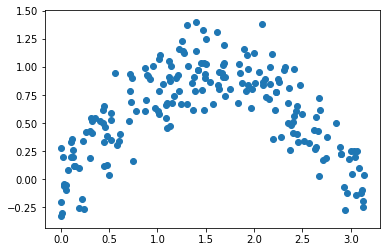

In [4]:
import matplotlib.pyplot as plt
plt.scatter(xs,ys)
plt.show()

We now pretend that we don&rsquo;t know the source of this data, and we wish
to &ldquo;learn&rdquo; the relationship between the $x$&rsquo;s and the $y$&rsquo;s.  Of
course, the truth is that $y = \sin x$ plus some noise, but let&rsquo;s
forget about that and see what we can recover.



## Linear regression



We&rsquo;ve been learning about linear regression, so let&rsquo;s use
`scikit-learn` to **again** perform linear regression on our data.



In [5]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression().fit( xs, ys )

Let&rsquo;s make a plot our (linear!) model.



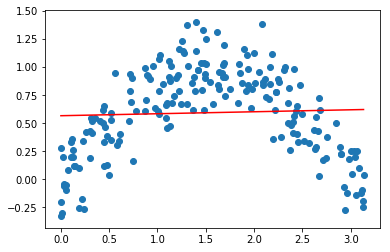

In [6]:
ys_predicted = lm.predict(xs)
plt.scatter(xs, ys)
plt.plot(xs, ys_predicted, color='r')
plt.show()

Because we followed the usual advice to ****look at our data****, we know
our data isn&rsquo;t modeled well by a straight line.  This is an example of
**underfitting**.  We need a more complex model to capture the actual
pattern of the data.



## Polynomial Regression



We find the &ldquo;polynomial features&rdquo; associated to the $x$&rsquo;s.  This
replaces the vector $(x) \in \mathbb{R}^1$ with the vector $(1,x,x^2)
\in \mathbb{R}^3$.

In [7]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
xs_poly = polynomial_features.fit_transform(xs)

Now (since this is a special example of multiple linear regression), we fit a linear regression model to the adjusted data.

In [8]:
qm = LinearRegression().fit( xs_poly, ys )

Let&rsquo;s plot the data as a scatterplot, and our model&rsquo;s predicted values
as a red curve.



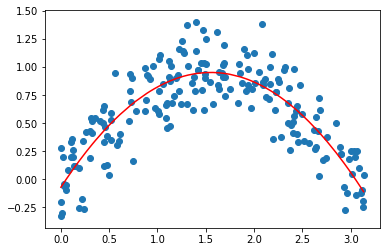

In [9]:
ys_predicted = qm.predict(xs_poly)
plt.scatter(xs, ys)
plt.plot(xs, ys_predicted, color='r')
plt.show()

That **looks** much better.  Is it &ldquo;actually&rdquo; better?



In [10]:
print("linear model score:",lm.score(xs,ys))
print("quadratic model score:",qm.score(xs_poly,ys))

linear model score: 0.0016713902321696672
quadratic model score: 0.7226877325521842


## Overfitting



### Exercise 

If degree 2 worked well, surely degree 25 is even better! Fit a degree-25 polynomial to the data and determined the $R^2$ score of the model.

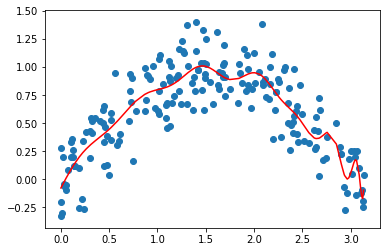

In [11]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=25)
xs_poly_25 = polynomial_features.fit_transform(xs)

model = LinearRegression().fit( xs_poly_25, ys )

ys_predicted = model.predict(xs_poly_25)
plt.scatter(xs, ys)
plt.plot(xs, ys_predicted, color='r')
plt.show()

In [12]:
model.score(xs_poly_25,ys)

0.7382041502291408

We see that our new model fits even better! It even captures some little bumps in the data! 

Actually, this is an example of *overfitting*, where the model fitting the noise in the data. To quantify how robustly our models are really fitting, we can use cross validation.

### Homework

Use cross-validation to determine the appropriate degree for polynomial regression on this data.

**Remark:** In the cross-validation experiments last class, our datasets were stored as dataframes. If you use the code from last class as a starting point, this will have to be addressed.

In [14]:
import pandas as pd
from sklearn.model_selection import KFold

X = pd.DataFrame(xs)
X_poly = pd.DataFrame(xs_poly)
X_poly_25 = pd.DataFrame(xs_poly_25)
Y = pd.DataFrame(ys)

kf = KFold(n_splits=5, shuffle=True, random_state=1)
    
scores = []

# Split again so we can rerun this cell and get some randomness
for train_index, test_index in kf.split(X):
    X_train, X_test = X_poly.iloc[train_index], X_poly.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    model = LinearRegression().fit(X_train, y_train)
    score = model.score(X_test, y_test)
    scores.append(score)

print(scores)
print(sum(scores)/len(scores))

[0.632137562631052, 0.7566237913778945, 0.7707956591944053, 0.6454704927263968, 0.7292938432587011]
0.70686426983769


# Logistic Regression

Like linear regression, logistic regression seeks a function which models a given data set as faithfully as possible. A main distinction is that logistic regression treats *discrete* response variables, which we refer to as *labels*.

## Motivating Example

Recall the `iris` dataset, containing biological measurements for samples of a few different flower species. 

In [15]:
import seaborn as sns # sns is the standard abbreviation for seaborn

iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


The dataset contains flowers from three different species, as we can see below.

In [16]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Let's subset the dataframe to get a dataframe containing only two of the species.

In [17]:
df = iris[(iris.species == 'setosa') | (iris.species == 'versicolor')]
# The vertical line | is read as "or".
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


Finally, let's create a scatterplot of all points in this new dataframe, with 'petal_length' on the $x$-axis and 'petal_width' on the $y$-axis.

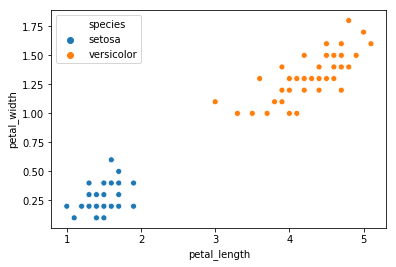

In [18]:
sns.scatterplot(x="petal_length", y="petal_width",
                hue="species", data=df)

We observe that the species are quite separated in this scatterplot. It stands to reason that we should be able to predict the species of a flower based on its petal lenth and width.

Of course, the method of prediction that we used last time (linear regression) doesn't make sense here. Our response variables are labels 'setosa' and 'versicolor', rather than real numbers!

## Logistic Regression Problem Setup


In the *logistic regression* problem, we are given data consisting of:

- a set of *explanatory variables* $X = \{\vec{x}_1,\ldots,\vec{x}_n\}$, each $\vec{x}_j \in \mathbb{R}^d$

- a set of *response variables* $y = \{y_1,\ldots,y_n\}$. Now our response variables are *discrete*, say $y_j \in \{0,1\}$ for all $j$. In this setting they $y_j$'s are called labels.

- we seek a function $f$ such that $f(\vec{x}_j) = y_j$ for each $j$. 

Achieving the goal may not be possible (the labels may not be completely determined by the features). In any case, we need to formulate this in a way where there is some hope of finding a solution (i.e., amenable to gradient descent).

We fix a class of functions of the form
$$
f(\vec{x}) = \frac{1}{1 + \exp(-g(\vec{x}))},
$$
with 
$$
g(\vec{x}) = \beta_1 x^1 + \cdots + \beta_d x^d + b.
$$
The goals is then to find the weights $\beta_1,\ldots,\beta_d,b$ which minimize the *loss function*
$$
L(\beta_1,\ldots,\beta_d,b) = - \frac{1}{n} \sum_{j=1}^n \Big[ y_j \log(f(\vec{x}_j)) + (1 - y_j) \log(1 - f(\vec{x}_j)) \Big]
$$

### Exercise: Why is This a Reasonable Thing to Do?

Let's pause for a moment to see why this makes sense. The *sigmoid function* is given by
$$
S(x) = \frac{1}{1 + \exp(-x)}.
$$
So we are considering functions of the form
$$
f(\vec{x}) = S(g(\vec{x})),
$$
where $g$ is a linear function as defined above. 

Plot the sigmoid function over the interval $[-10,10]$. Does it make sense that this would be useful for classifying binary variables? 

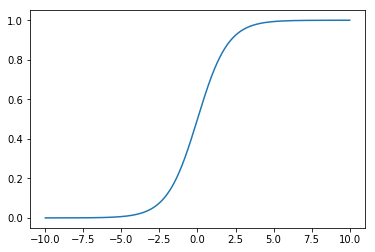

In [19]:
# Some potentially useful functions
from math import exp, log
import matplotlib.pyplot as plt
import numpy as np

sigmoid = lambda x:1/(1+exp(-x))

xs = np.linspace(-10,10,1800)
plt.plot(xs,[sigmoid(x) for x in xs])

### Exercise, Continued

Now consider the loss function. The goal of the loss function should be to 'penalize' wrong guesses. So the summand
$$
-\big[y_j \log(f(\vec{x}_j)) + (1 - y_j) \log(1 - f(\vec{x}_j))\big]
$$
should be:
- *small* if $y_j = 1$ and $f(\vec{x}_j) \approx 1$ or $y_j = 0$ and $f(\vec{x}_j) \approx 0$;
- *large* if $y_j = 1$ and $f(\vec{x}_j) \approx 0$ or $y_j =0$ and $f(\vec{x}_j) \approx 1$.

Try a few 'artificial examples' to verify that this expression behaves the way that we want  (i.e., artificially pick values of $f(\vec{x}_j)$, $y_j$ and evaluate the expression).

In [20]:
def summand(fx,y):
    return -(y*log(fx) + (1-y)*log(1-fx))

print(summand(0.01,0))
print(summand(0.01,1))
print(summand(0.99,0))
print(summand(0.99,1))

0.01005033585350145
4.605170185988091
4.605170185988091
0.01005033585350145


## Solving the Logistic Regression Problem

Unlike linear regression, the logistic regression problem has no explicit solution. Nonetheless, one can check that the loss function is *convex*---this is a mathematical condition which guarantees the loss function has a unique minimum (an example of a convex function is $h(x) = x^2$).

This minimum can be (and typically *is*) found by gradient descent (or some variation of it). The gradient descent function we studied last class could be modified to work here. 

Of course, logistic regression is built into packages such as `scikit-learn`. The computation of the gradient in this case is a bit more involved, so let's skip on coding this ourselves and just use an existing function! The problem setup that is used by `scikit-learn` is a bit different than what was described above (e.g., they use a 'regularized' cost function), but is morally the same thing.

## Logistic Regression on the Iris Dataset

Let's apply logistic regression to see if we can classify flower species by petal length and width. 

In [21]:
# Import some useful functions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Let's get our data. The explanatory variables are 'petal_length' and 'petal_width' (so there are two features, and each element of our set $X$ is a vector in $\mathbb{R}^2$). We also need to get the set $y$ consisting of labels. Let's set the species 'setosa' to have label 1 and 'versicolor' to have label 0.

In [22]:
X = df[['petal_length','petal_width']] # We only want column values for these variables
y = df.species == 'setosa' # First construct a boolean sequence
y = [int(val) for val in y] # Set 'True' to 1, 'False' to 0

To test the performance of logistic regression for this classification problem, we will split our data into a 'testing set' and a 'training set'. We have already imported a function which will do this automatically.

In [23]:
# Construct the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Check the sizes of the sets
print(X_train.shape)
print(X_test.shape)
print(len(y_train))
print(len(y_test))

(75, 2)
(25, 2)
75
25


Now we will fit the logistic regression model to our training data. The optimization is done using a fancier method than gradient descent https://en.wikipedia.org/wiki/Limited-memory_BFGS. It is still an iterative approach (like gradient descent), which is killed at 10,000 iterations if necessary.

In [24]:
model = LogisticRegression(solver='lbfgs', max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

We can take a look at the coefficients. These are the $\beta_1$, $\beta_2$ and $b$ from the description above, respectively.

In [25]:
model.coef_, model.intercept_

(array([[-2.38392297, -1.01629408]]), array([7.3375087]))

So we have found that the optimal classification function is given by
$$
f(\vec{x}) = \frac{1}{1 + \exp(2.384 x^1 + 1.016 x^2 - 7.338)}
$$

The logistic regression model can be used to predict the species of a flower in the testing set. Let's look at the first few examples in the testing set. We see that the first two are 'versicolor' (label 0) and the last is 'setosa' (label 1).

In [26]:
print(X_test[0:3])
print(y_test[0:3])

    petal_length  petal_width
80           3.8          1.1
84           4.5          1.5
33           1.4          0.2
[0, 0, 1]


We predict the label of a sample by applying the function $f$ shown above to the 'petal_length' and 'petal_width' numbers. If $f$ returns a value less than 0.5, we classify the sample as 0, or 'versicolor'. If $f$ returns a value greater than 0.5, we classify the sample as 1, or 'setosa'.

This can be performed using the `predict` attribute of the model.

In [27]:
model.predict(X_test[0:3])

array([0, 0, 1])

So our model mades some correct predictions! This should not be too surprising, since the data was pretty well separated in the plot above. In fact, we can see that our model must do a pretty good job by plotting the function $f$ written above on each sample in the dataset.

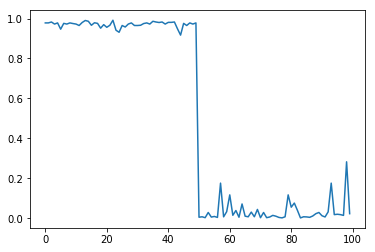

In [28]:
# Define the function f
def f(x1,x2):
    return 1/(1+exp(2.384*x1+1.016*x2-7.338))

# Turn the data into an np array for convenience
X2 = np.array(X)
# Apply f to all of the samples
ys = [f(x[0],x[1]) for x in X2]

# Plot the y values
plt.plot(ys)

By the way, the above could have also been done directly using `scikit-learn` functions:

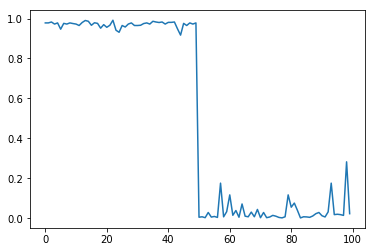

In [29]:
plt.plot(model.predict_proba(X)[:,1])

This looks like a pretty convincing split between the flower species. To be safe, we can double check the classification scores of the model on the testing and training sets.

In [30]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

1.0
1.0


This is calculated as follows. For each record in, say, `X_train`, we assign a label via the classification function $f$. We compare this to the correct label from `y_train`, count the number of correct labels across all samples, then divide by the number of samples. So our model perfectly classifies everything. 

Once again, this is not too surprising since the data was so well separated...

## A Harder Example

Let's generate some toy data to make sure that logistic regression isn't "too good to be true".

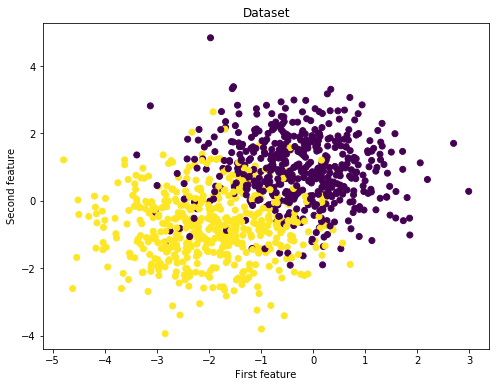

In [31]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples= 1000, centers=2, center_box = [-2,2], random_state=1)
# Play with the parameters above to try different examples.

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

### Exercise

Replicate the above experiment on this toy data (split into train/test data, train a model, determine its performance). Try varying the parameters in the toy data creation to see how logistic regression performs in different circumstances.

In [32]:
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [33]:
model = LogisticRegression(solver='lbfgs', max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
model.coef_, model.intercept_

(array([[-1.63121158, -1.53528989]]), array([-1.75748054]))

In [35]:
model.score(X_test,y_test)

0.892

### Exercise

In the `iris` dataset, the species 'versicolor' and 'virginica' seem to be not as well separated. Train/test a regression model to distinguish these species. 

### Exercise

Load the `mpg` dataset from `seaborn`. See if you can predict whether a car was made in the USA using logistic regression. Which explanatory variables have the biggest effect on classification score?

In [36]:
import seaborn as sns

mpg = sns.load_dataset('mpg')

In [41]:
mpg = mpg.dropna()

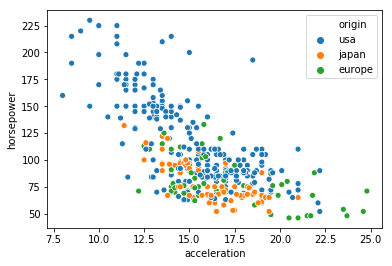

In [42]:
sns.scatterplot(x="acceleration", y="horsepower",
                hue="origin", data=mpg)

In [43]:
X = mpg[['horsepower','weight','acceleration']]
y = mpg.origin == 'usa'

In [44]:
y = [int(a) for a in y]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LogisticRegression(solver='lbfgs', max_iter=10000)
model.fit(X_train, y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.782312925170068
0.8367346938775511


In [46]:
model.coef_

array([[-0.04598303,  0.00368435, -0.33378803]])

### Exercise 

One great source of both data **and** community is Kaggle.

Go to [https://www.kaggle.com/c/titanic/data>](https://www.kaggle.com/c/titanic/data>)to download data
describing passengers from the Titanic, and whether or not they
survived their voyage.  Can you use logistic regression (or any other
techniques!) to predict who surived?  (Perhaps &ldquo;predict&rdquo; is something
of a misnomer since the Titanic has already sunk!)